In [1]:
#importing necessary libraries
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import requests
import json
import csv
import datetime
import dateutil.parser
import unicodedata
sns.set() # use seaborn plotting style

#This module provides regular expressions
import re

In [2]:
# Reads dataset file
df = pd.read_csv('Data_Set_Student_Reviews.csv', header = None, encoding='utf-8')

# Changes header title
df.columns=['Text']

df

Text
0    1.                 Before uploading the video ...
1    2.                Before, she is kind to her s...
2    3.                Can be improved. Hope she co...
3    4.                For this subject, some topic...
4                5.                Give more examples.
..                                                 ...
848  846.       The professor was active in google ...
849   847.        Very nice and accommodating teacher!
850  848.       Words  can''t express how i am grat...
851  849.       in my opinion, the instructor''s wa...
852  850.        please speak tagalog when teaching...

[853 rows x 1 columns]

In [3]:
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = text.lower()
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7F]+',r' ', text) # replace non-ASCII characters
    text = re.sub('\s\s+', ' ', text)  # remove extra whitespace
    return text

# Cleaning the text in the Text column
df['Cleaned_Text'] = df['Text'].apply(clean)
df

Text  \
0    1.                 Before uploading the video ...   
1    2.                Before, she is kind to her s...   
2    3.                Can be improved. Hope she co...   
3    4.                For this subject, some topic...   
4                5.                Give more examples.   
..                                                 ...   
848  846.       The professor was active in google ...   
849   847.        Very nice and accommodating teacher!   
850  848.       Words  can''t express how i am grat...   
851  849.       in my opinion, the instructor''s wa...   
852  850.        please speak tagalog when teaching...   

                                          Cleaned_Text  
0     before uploading the video discussion i sugge...  
1     before she is kind to her students my classma...  
2     can be improved hope she considers personal n...  
3     for this subject some topics are not easy but...  
4                                  give more examples   
..                                                 ...  
848   the professor was active in google meets spec...  
849               very nice and accommodating teacher   
850   words can t express how i am grateful with ou...  
851   in my opinion the instructor s way of encoura...  
852          please speak tagalog when teaching please  

[853 rows x 2 columns]

In [4]:
# Sorts Text column
df.sort_values('Text', inplace = True)

# Counts numbers of duplicates
duplicates = df.pivot_table(columns=['Text'], aggfunc='size')
duplicates

Text
-                   She didn''t release our grades from prelims to midterms."                                                                                                                                                                                                                                                                                                                                                                                                             1
-                   Titus 2:7-8"                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
-                   she only reads the modu

In [5]:
#set tagalog stopwords
stop_words_tl = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang",
 "apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil",
 "dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa",
 "ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba",
 "ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas",
 "ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila",
 "kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan",
 "katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat",
 "lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami",
 "marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na",
 "nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan",
 "ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano",
 "pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan",
 "panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta",
 "sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad",
 "tungkol","una","walang"]

In [6]:
#convert the list to set to match the type of the english stopwords
stop_words_tl = set(stop_words_tl)

In [7]:
#set english stopwords
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stop_words_en=set(stopwords)
print(stop_words_en)

{'above', 'whom', 'an', 'its', 'of', 'to', 'who', "aren't", 'if', 'few', 'didn', 'no', 'because', 'ain', 'aren', 'on', 'o', 'then', 'same', 'theirs', "hasn't", 'more', 'y', 'shouldn', 'hasn', "wouldn't", 'a', "haven't", 'from', 'those', 'you', 'they', "should've", 'between', 'about', 'did', 'where', 'my', 'while', "shouldn't", 'below', 'so', 'only', 'for', 'ourselves', 'in', "you'd", 'are', 'into', 'them', 'have', "you'll", 'any', 'nor', 'haven', 'here', 'd', 'ours', 'isn', "you're", 'until', "doesn't", 'most', 'these', "she's", 'other', "that'll", 'such', 'why', 'but', 'after', 'ma', 'once', 'now', "you've", "didn't", 'through', 'off', 'myself', 's', 'will', 'own', 'than', 'i', "needn't", 'been', 'yours', 'which', 'at', "hadn't", 'your', 'she', "shan't", 'can', 'it', 'up', 'couldn', 'this', 'our', 'doing', 'hadn', 'against', 've', 'her', 'themselves', 'do', 'needn', 'hers', 'was', 'too', "don't", 'mightn', 'what', 'with', 'each', 'him', 'don', 'he', 't', 'yourself', 're', 'further', '

In [8]:
#removing english and tagalog stopwords
from nltk.tokenize import word_tokenize

def removing_en_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if not word in stop_words_tl if not word in stop_words_en]
    return text
df['removed_stopwords'] = df.Cleaned_Text.apply(lambda x: removing_en_stopwords(x))
df

Text  \
170  -                   She didn''t release our gr...   
49                    -                   Titus 2:7-8"   
311  -                   she only reads the module ...   
0    1.                 Before uploading the video ...   
9    10.             I appreciate the faculty conce...   
..                                                 ...   
95   95.            Activities are timed which is o...   
96   96.           At first, I liked my professor b...   
97   97.            Doesn''t conduct classes, but p...   
98                        98.           Excellent prof   
99   99.           For the duration of this semeste...   

                                          Cleaned_Text  \
170   she didn t release our grades from prelims to...   
49                                              titus    
311   she only reads the module when she is having ...   
0     before uploading the video discussion i sugge...   
9     i appreciate the faculty concerned in this su...   
..                                                 ...   
95    activities are timed which is okay but someti...   
96    at first i liked my professor because she is ...   
97         doesn t conduct classes but post activities   
98                                      excellent prof   
99    for the duration of this semester she never d...   

                                     removed_stopwords  
170               [release, grades, prelims, midterms]  
49                                             [titus]  
311  [reads, module, class, explanations, students,...  
0    [uploading, video, discussion, suggest, discus...  
9    [appreciate, faculty, concerned, subject, effo...  
..                                                 ...  
95   [activities, timed, okay, sometimes, frustrati...  
96   [first, liked, professor, strict, learned, muc...  
97                [conduct, classes, post, activities]  
98                                   [excellent, prof]  
99   [duration, semester, never, discussed, lessons...  

[853 rows x 3 columns]

In [9]:
#Convert list to String
df2 = pd.DataFrame(columns=['removed_stopwords'])
def listToString(s): 
    str1 = ""
    for ele in s:
        str1 = str1 + " " + ele
    return str1
df2['cleaned_texts'] = df.removed_stopwords.apply(lambda x:listToString(x))

In [10]:
#Export dataframe for manual clssification and rule based classification
df2.to_csv('sentimentAnalysis_en.csv')
del df2['removed_stopwords']
df2

cleaned_texts
170                    release grades prelims midterms
49                                               titus
311   reads module class explanations students gift...
0     uploading video discussion suggest discuss cl...
9     appreciate faculty concerned subject efforts ...
..                                                 ...
95    activities timed okay sometimes frustrating e...
96    first liked professor strict learned much dis...
97                     conduct classes post activities
98                                      excellent prof
99    duration semester never discussed lessons eve...

[853 rows x 1 columns]

In [11]:
# Replaces empty string rows with NaN vallues
nan_value = float("NaN")
df2['cleaned_texts'].replace("", nan_value, inplace=True)

# Drops NaN Values
df2.dropna(subset = ["cleaned_texts"], inplace=True)
df2

cleaned_texts
170                    release grades prelims midterms
49                                               titus
311   reads module class explanations students gift...
0     uploading video discussion suggest discuss cl...
9     appreciate faculty concerned subject efforts ...
..                                                 ...
95    activities timed okay sometimes frustrating e...
96    first liked professor strict learned much dis...
97                     conduct classes post activities
98                                      excellent prof
99    duration semester never discussed lessons eve...

[829 rows x 1 columns]

MACHINE-BASED APPROACH (Naive-Bayes)

In [65]:
#loading dataset
data = pd.read_csv('downloads/cleaned_text.csv')

#Defining train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

In [66]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#creating the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [68]:
#fitting the model
model.fit(train.cleaned_texts, train.classification)
labels = model.predict(test.cleaned_texts)

Text(89.18, 0.5, 'predicted label')

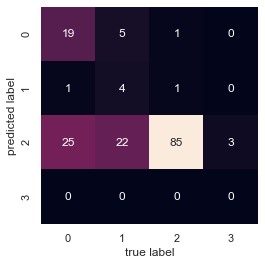

In [69]:
#displaying the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.classification, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [73]:
#displaying the accuracy score of the model
print("The accuracy is {}".format(accuracy_score(test_data.classification, labels)))

The accuracy is 0.6506024096385542


The model has a lower accuracy due to the heterogeneity of the dataset. 

MACHINE-BASED APPROACH (SVM)

In [74]:
#loading dataset
data = pd.read_csv('downloads/cleaned_text.csv')

#Defining train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

In [75]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
#creating the model
model = make_pipeline(TfidfVectorizer(), SVC())

In [77]:
#fitting the model
model.fit(train.cleaned_texts, train.classification)
labels = model.predict(test.cleaned_texts)

Text(89.18, 0.5, 'predicted label')

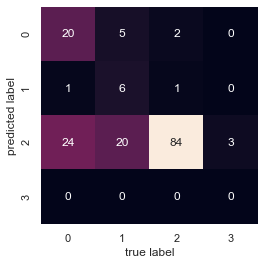

In [78]:
#displaying the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.classification, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [79]:
#displaying the accuracy score of the model
print("The accuracy is {}".format(accuracy_score(test_data.classification, labels)))

The accuracy is 0.6626506024096386


Similar to the Multinomial Naive Bayes model, this model using SVC also has an underwhelming accuracy score due to the mixed information contained by the dataset.